# IE 423 PROJECT PART 2
<p>Batuhan Özkan/ 2018402033<br>
Kaan Ertan/ 2019402087 <br>
Melis Tuncer/ 2019402156</p>

## Part-1:

In [51]:
# Import required libraries

import pandas as pd
import os
import itertools
from itertools import combinations  
from scipy.stats import pearsonr
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from statsmodels.stats.diagnostic import het_breuschpagan
import statsmodels.api as sm

In [20]:
# Open and read the stock file provided
csv_files_directory = "D:\\DESKTOP\\test_data"

# Get a list of all CSV files in the directory
csv_files = [file for file in os.listdir(csv_files_directory) if file.endswith('.csv')]

# Initialize an empty list to store individual DataFrames
dfs = []

# Iterate through each CSV file and read its data into a DataFrame
for file in csv_files:
    # Construct the full path to the CSV file
    file_path = os.path.join(csv_files_directory, file)

    # Read the CSV file into a DataFrame
    df = pd.read_csv(file_path)

    # Append the DataFrame to the list
    dfs.append(df)

# Concatenate the list of DataFrames into a single DataFrame
combined_data = pd.concat(dfs, ignore_index=True)

# Convert the 'timestamp' column to datetime
combined_data['timestamp'] = pd.to_datetime(combined_data['timestamp'])

# Get unique company names from the "short_name" column
unique_companies = combined_data['short_name'].unique()

# Create a dictionary to store DataFrames for each unique company
company_dataframes = {}

# Iterate through unique company names and create a DataFrame for each
for company in unique_companies:
    company_dataframes[company] = combined_data[combined_data['short_name'] == company].reset_index(drop=True)

print(company_dataframes)


{'THYAO':                       timestamp   price short_name
0     2018-01-02 09:00:00+03:00   15.79      THYAO
1     2018-01-02 10:00:00+03:00   16.01      THYAO
2     2018-01-02 11:00:00+03:00   16.05      THYAO
3     2018-01-02 12:00:00+03:00   16.05      THYAO
4     2018-01-02 13:00:00+03:00   16.06      THYAO
...                         ...     ...        ...
14637 2023-11-21 09:00:00+03:00  256.00      THYAO
14638 2023-11-21 10:00:00+03:00  255.00      THYAO
14639 2023-11-21 11:00:00+03:00  257.75      THYAO
14640 2023-11-21 12:00:00+03:00  258.25      THYAO
14641 2023-11-21 13:00:00+03:00  258.25      THYAO

[14642 rows x 3 columns], 'AKBNK':                       timestamp    price short_name
0     2018-01-02 09:00:00+03:00   6.9475      AKBNK
1     2018-01-02 10:00:00+03:00   7.0602      AKBNK
2     2018-01-02 11:00:00+03:00   7.0954      AKBNK
3     2018-01-02 12:00:00+03:00   7.0814      AKBNK
4     2018-01-02 13:00:00+03:00   7.1024      AKBNK
...                         ..

In [21]:
# Create an empty list to store individual DataFrames
correlation_dfs = []

# Iterate through unique combinations of companies
for company1, company2 in combinations(company_dataframes.keys(), 2):
    # Get the price columns for the two companies
    prices_company1 = company_dataframes[company1]['price']
    prices_company2 = company_dataframes[company2]['price']

    # Find common timestamps
    common_timestamps = prices_company1.index.intersection(prices_company2.index)

    # Filter DataFrames to keep only common timestamps
    prices_company1_common = prices_company1.loc[common_timestamps]
    prices_company2_common = prices_company2.loc[common_timestamps]

    # Calculate Pearson correlation
    correlation_coefficient, _ = pearsonr(prices_company1_common, prices_company2_common)

    # Create a DataFrame for the current pair of companies
    correlation_df = pd.DataFrame({
        'Company1': [company1],
        'Company2': [company2],
        'Pearson_Correlation': [correlation_coefficient]
    })

    # Append the DataFrame to the list
    correlation_dfs.append(correlation_df)

# Concatenate the list of DataFrames into a single DataFrame
correlation_results = pd.concat(correlation_dfs, ignore_index=True)

# Sort based on correlation 
correlation_results = correlation_results.sort_values(by='Pearson_Correlation', ascending=False).reset_index(drop=True)

print(correlation_results)


    Company1 Company2  Pearson_Correlation
0      THYAO    PGSUS             0.992990
1      AKBNK    GARAN             0.992619
2      KCHOL    YKBNK             0.989403
3      ISCTR    YKBNK             0.988707
4      SAHOL     SISE             0.988243
..       ...      ...                  ...
430    KOZAA    HALKB             0.748590
431    KRDMD    HALKB             0.727673
432    HALKB    VESTL             0.706653
433    EREGL    VAKBN             0.679656
434    EREGL    HALKB             0.614556

[435 rows x 3 columns]


In [22]:
# Display the correlation_results DataFrame
correlation_results.head(10)

,Company1,Company2,Pearson_Correlation
0,THYAO,PGSUS,0.992990
1,AKBNK,GARAN,0.992619
2,KCHOL,YKBNK,0.989403
3,ISCTR,YKBNK,0.988707
4,SAHOL,SISE,0.988243
5,DOHOL,GUBRF,0.987896
6,THYAO,SAHOL,0.987870
7,SAHOL,YKBNK,0.987586
8,AKBNK,ISCTR,0.987428
9,PGSUS,SAHOL,0.987385


# GARAN & AKBNK

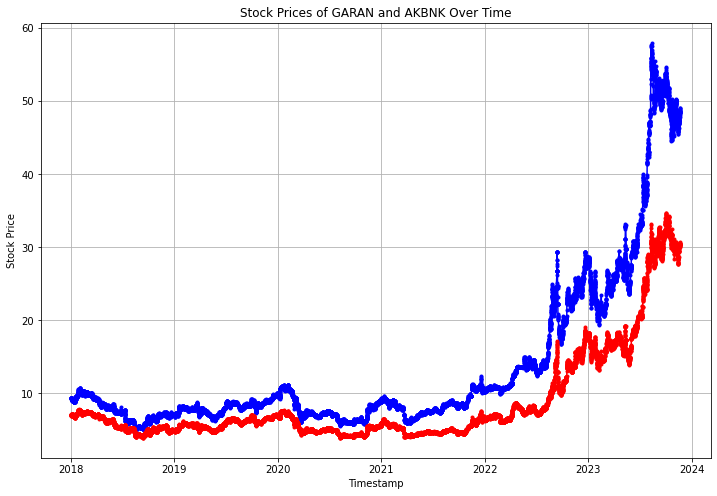

In [23]:
# GARAN & AKBNK PLOT

garan_data = combined_data[combined_data['short_name'] == 'GARAN']
akbnk_data = combined_data[combined_data['short_name'] == 'AKBNK']

# Plotting
plt.figure(figsize=(12, 8))
plt.plot(garan_data['timestamp'], garan_data['price'], marker='.', linestyle='-', label='GARAN', color='b')
plt.plot(akbnk_data['timestamp'], akbnk_data['price'], marker='.', linestyle='-', label='AKBNK', color='r')

plt.title('Stock Prices of GARAN and AKBNK Over Time')
plt.xlabel('Timestamp')
plt.ylabel('Stock Price')
plt.grid(True)
plt.show()

In [24]:
# Get the prices of the 'AKBNK' stock
akbnk_prices = company_dataframes['AKBNK']['price']

# Get the prices of the 'GARAN' stock
garan_prices = company_dataframes['GARAN']['price']

# Transform the data to a 2D Matrix
akbnk_prices = np.array(akbnk_prices).reshape(-1, 1)
garan_prices = np.array(garan_prices).reshape(-1, 1)

# Separate the data into training and test sets
akbnk_prices_train, akbnk_prices_test, garan_prices_train, garan_prices_test = train_test_split(
    akbnk_prices, garan_prices, test_size=0.2, random_state=42
)

# Create the linear regression model
model = LinearRegression()

# Train the model
model.fit(akbnk_prices_train, garan_prices_train)

# Make predictions on the test data
garan_pred = model.predict(akbnk_prices_test)

# Evaluate the model performance
mse = mean_squared_error(garan_prices_test, garan_pred)
r2 = r2_score(garan_prices_test, garan_pred)

# Model coefficients
coeff = model.coef_[0]
intercept = model.intercept_

print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')
print(f'Coefficients: {coeff}')
print(f'Intercept: {intercept}')


Mean Squared Error: 1.6986666718261882
R-squared: 0.9857511814481051
Coefficients: [1.65789285]
Intercept: [-0.96486988]


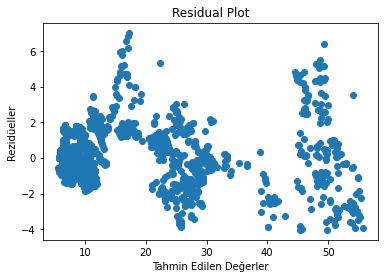

p-value for Breusch-Pagan Test: 4.5391042470404615e-114


In [25]:
# Firstly, we draw the residual graph
residuals = garan_prices_test - garan_pred

plt.scatter(garan_pred, residuals)
plt.xlabel('Tahmin Edilen Değerler')
plt.ylabel('Rezidüeller')
plt.title('Residual Plot')
plt.show()

# Breusch-Pagan Test
# Create the exogenous matrix by adding the constant term
exog = sm.add_constant(akbnk_prices_test)
_, p_value, _, _ = het_breuschpagan(residuals, exog)
print(f'p-value for Breusch-Pagan Test: {p_value}')


Since the test result is very small, the residuals cannot be said to have constant variance. Below we try log transformation to deal with this issue.

Mean Squared Error: 0.00978721463058799
R-squared: 0.9704971401745913
Coefficients: 1.0680244870139182
Intercept: 0.2710556596872733


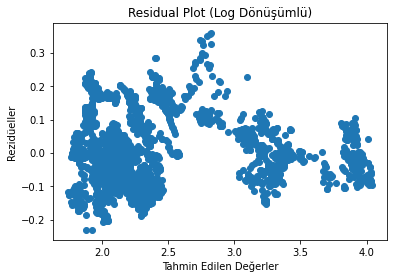

p-value for Breusch-Pagan Test: 2.4514812609347564e-09
                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.971
Model:                            OLS   Adj. R-squared:                  0.970
Method:                 Least Squares   F-statistic:                 1.788e+05
Date:                Mon, 11 Dec 2023   Prob (F-statistic):               0.00
Time:                        19:57:49   Log-Likelihood:                 2620.2
No. Observations:                2929   AIC:                            -5236.
Df Residuals:                    2927   BIC:                            -5224.
Df Model:                           1                                         
Covariance Type:                  HC3                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------

In [26]:
# Fetch the prices for the 'AKBNK' stock
akbnk_prices = company_dataframes['AKBNK']['price']

# Fetch the prices for the 'GARAN' stock
garan_prices = company_dataframes['GARAN']['price']

# Apply log transformation
akbnk_prices_log = np.log(akbnk_prices)
garan_prices_log = np.log(garan_prices)

# Separate the data into training and test sets
akbnk_prices_train, akbnk_prices_test, garan_prices_train, garan_prices_test = train_test_split(
    akbnk_prices_log, garan_prices_log, test_size=0.2, random_state=42
)

# Create the linear regression model
model = LinearRegression()

# Train the model
model.fit(akbnk_prices_train.values.reshape(-1, 1), garan_prices_train.values)

# Make predictions on the test data
garan_pred = model.predict(akbnk_prices_test.values.reshape(-1, 1))

# Evaluate the model performance
mse = mean_squared_error(garan_prices_test, garan_pred)
r2 = r2_score(garan_prices_test, garan_pred)

# Model coefficients
coeff = model.coef_[0]
intercept = model.intercept_

print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')
print(f'Coefficients: {coeff}')
print(f'Intercept: {intercept}')

# Residual plot
residuals = garan_prices_test - garan_pred
plt.scatter(garan_pred, residuals)
plt.xlabel('Tahmin Edilen Değerler')
plt.ylabel('Rezidüeller')
plt.title('Residual Plot (Log Dönüşümlü)')
plt.show()

# Breusch-Pagan Test
# Create the exogenous matrix by adding the constant term
exog = sm.add_constant(akbnk_prices_test)

# Apply the Breusch-Pagan test
_, p_value, _, _ = het_breuschpagan(residuals, exog)

print(f'p-value for Breusch-Pagan Test: {p_value}')

# Update model results using Heteroskedasticity-Robust Standard Errors
results = sm.OLS(garan_prices_test, exog).fit()
results_robust = results.get_robustcov_results(cov_type='HC3')

# Print the updated results
print(results_robust.summary())


Now the test result is better, but not sufficient to prove the assumption of constant variance. Below we exclude the last year from the data and try again.

In [27]:
# Open and read the stock file provided
csv_files_directory = "D:\\DESKTOP\\test_data_2"

# Get a list of all CSV files in the directory
csv_files = [file for file in os.listdir(csv_files_directory) if file.endswith('.csv')]

# Initialize an empty list to store individual DataFrames
dfs = []

# Iterate through each CSV file and read its data into a DataFrame
for file in csv_files:
    # Construct the full path to the CSV file
    file_path = os.path.join(csv_files_directory, file)

    # Read the CSV file into a DataFrame
    df = pd.read_csv(file_path)

    # Append the DataFrame to the list
    dfs.append(df)

# Concatenate the list of DataFrames into a single DataFrame
combined_data = pd.concat(dfs, ignore_index=True)

# Convert the 'timestamp' column to datetime
combined_data['timestamp'] = pd.to_datetime(combined_data['timestamp'])

# Get unique company names from the "short_name" column
unique_companies = combined_data['short_name'].unique()

# Create a dictionary to store DataFrames for each unique company
company_dataframes = {}

# Iterate through unique company names and create a DataFrame for each
for company in unique_companies:
    company_dataframes[company] = combined_data[combined_data['short_name'] == company].reset_index(drop=True)

print(company_dataframes)


{'THYAO':                       timestamp   price short_name
0     2018-01-02 09:00:00+03:00   15.79      THYAO
1     2018-01-02 10:00:00+03:00   16.01      THYAO
2     2018-01-02 11:00:00+03:00   16.05      THYAO
3     2018-01-02 12:00:00+03:00   16.05      THYAO
4     2018-01-02 13:00:00+03:00   16.06      THYAO
...                         ...     ...        ...
12404 2022-12-23 14:00:00+03:00  142.00      THYAO
12405 2022-12-23 15:00:00+03:00  142.10      THYAO
12406 2022-12-23 16:00:00+03:00  141.00      THYAO
12407 2022-12-23 17:00:00+03:00  141.90      THYAO
12408 2022-12-23 18:00:00+03:00  141.80      THYAO

[12409 rows x 3 columns], 'AKBNK':                       timestamp    price short_name
0     2018-01-02 09:00:00+03:00   6.9475      AKBNK
1     2018-01-02 10:00:00+03:00   7.0602      AKBNK
2     2018-01-02 11:00:00+03:00   7.0954      AKBNK
3     2018-01-02 12:00:00+03:00   7.0814      AKBNK
4     2018-01-02 13:00:00+03:00   7.1024      AKBNK
...                         ..

In [48]:
# Create an empty list to store individual DataFrames
correlation_dfs = []

# Iterate through unique combinations of companies
for company1, company2 in combinations(company_dataframes.keys(), 2):
    # Get the price columns for the two companies
    prices_company1 = company_dataframes[company1]['price']
    prices_company2 = company_dataframes[company2]['price']

    # Find common timestamps
    common_timestamps = prices_company1.index.intersection(prices_company2.index)

    # Filter DataFrames to keep only common timestamps
    prices_company1_common = prices_company1.loc[common_timestamps]
    prices_company2_common = prices_company2.loc[common_timestamps]

    # Calculate Pearson correlation
    correlation_coefficient, _ = pearsonr(prices_company1_common, prices_company2_common)

    # Create a DataFrame for the current pair of companies
    correlation_df = pd.DataFrame({
        'Company1': [company1],
        'Company2': [company2],
        'Pearson_Correlation': [correlation_coefficient]
    })

    # Append the DataFrame to the list
    correlation_dfs.append(correlation_df)

# Concatenate the list of DataFrames into a single DataFrame
correlation_results = pd.concat(correlation_dfs, ignore_index=True)

result_row = correlation_results[(correlation_results['Company1'] == 'AKBNK') & (correlation_results['Company2'] == 'GARAN')]
print(result_row)


   Company1 Company2  Pearson_Correlation
37    AKBNK    GARAN             0.966985


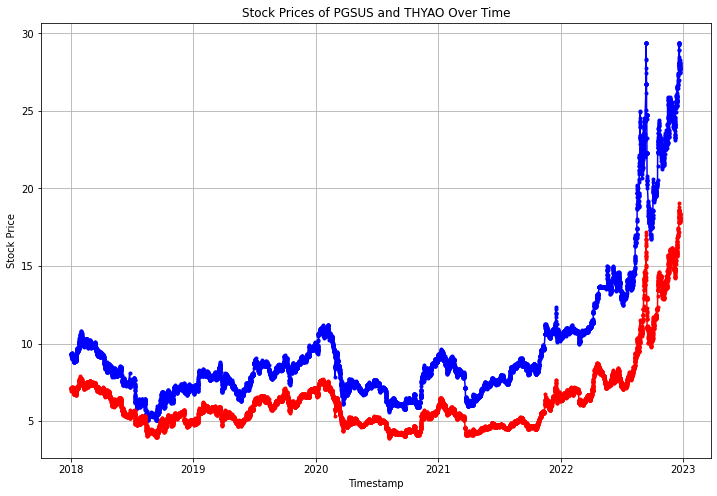

In [29]:
# GARAN & AKBNK PLOT

garan_data = combined_data[combined_data['short_name'] == 'GARAN']
akbnk_data = combined_data[combined_data['short_name'] == 'AKBNK']

# Plotting
plt.figure(figsize=(12, 8))
plt.plot(garan_data['timestamp'], garan_data['price'], marker='.', linestyle='-', label='GARAN', color='b')
plt.plot(akbnk_data['timestamp'], akbnk_data['price'], marker='.', linestyle='-', label='AKBNK', color='r')

plt.title('Stock Prices of PGSUS and THYAO Over Time')
plt.xlabel('Timestamp')
plt.ylabel('Stock Price')
plt.grid(True)
plt.show()

In [49]:
# Get the prices for the 'AKBNK' stocks
akbnk_prices = company_dataframes['AKBNK']['price']

# Get the prices for the 'GARAN' stocks
garan_prices = company_dataframes['GARAN']['price']

# Transfrom the data into a 2D matrix
akbnk_prices = np.array(akbnk_prices).reshape(-1, 1)
garan_prices = np.array(garan_prices).reshape(-1, 1)

akbnk_prices_log = np.log(akbnk_prices)
garan_prices_log = np.log(garan_prices)

# Separate the data into training and test sets 
akbnk_prices_train, akbnk_prices_test, garan_prices_train, garan_prices_test = train_test_split(
    akbnk_prices_log, garan_prices_log, test_size=0.2, random_state=42
)

# Create the linear regression model
model = LinearRegression()

# Train the model
model.fit(akbnk_prices_train, garan_prices_train)

# Conduct predictions on the test data
garan_pred = model.predict(akbnk_prices_test)

# Evaluate the model performance
mse = mean_squared_error(garan_prices_test, garan_pred)
r2 = r2_score(garan_prices_test, garan_pred)

# Model coefficients
coeff = model.coef_[0]
intercept = model.intercept_

print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')
print(f'Coefficients: {coeff}')
print(f'Intercept: {intercept}')


Mean Squared Error: 0.01065834688752106
R-squared: 0.9061895306616281
Coefficients: [1.11953382]
Intercept: [0.18246513]


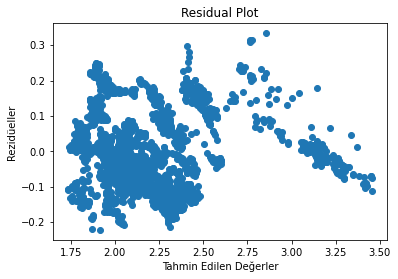

p-value for Breusch-Pagan Test: 0.031175049085175217


In [50]:
# Draw the residual graph
residuals = garan_prices_test - garan_pred

plt.scatter(garan_pred, residuals)
plt.xlabel('Tahmin Edilen Değerler')
plt.ylabel('Rezidüeller')
plt.title('Residual Plot')
plt.show()

# Breusch-Pagan test
# Create the exogenous matrix by adding the constant term
exog = sm.add_constant(akbnk_prices_test)
_, p_value, _, _ = het_breuschpagan(residuals, exog)
print(f'p-value for Breusch-Pagan Test: {p_value}')


Now the test result is satisfactory. We continue with predicting the last year's prices and calculating the residuals.

In [53]:
akbnk_df = company_dataframes['AKBNK']
garan_df = company_dataframes['GARAN']

# len(akbnk_prices_test) is the number of rows we want to select
num_rows_to_select = len(akbnk_prices_test)

# Use the tail method to select the last rows
akbnk_df_last_rows = akbnk_df.tail(num_rows_to_select)

garan_df_last_rows = garan_df.tail(num_rows_to_select)


# Conduct predictions on the test data
garan_pred_simulation = model.predict(np.array(akbnk_df_last_rows['price']).reshape(-1, 1))

residuals_simulation = garan_pred_simulation - np.array(garan_df_last_rows['price']).reshape(-1, 1) 

print(residuals_simulation)

[[-3.06426859]
 [-3.04746043]
 [-2.979361  ]
 ...
 [-7.31924255]
 [-7.46440347]
 [-7.47459123]]


In [33]:
# Change column names
akbnk_df_last_rows = akbnk_df_last_rows.rename(columns={'price': 'akbnk_price'})
garan_df_last_rows = garan_df_last_rows.rename(columns={'price': 'garan_price'})
garan_df_last_rows = garan_df_last_rows.rename(columns={'timestamp': 'timestamp2'})

# Join DataFrames
joined_df = pd.concat([akbnk_df_last_rows, garan_df_last_rows], axis=1)

# Add 'garan_pred' column
joined_df['garan_pred'] = garan_pred_simulation

# Add 'residuals' column
joined_df['residuals'] = residuals_simulation.flatten()



This joined_df dataframe includes all the price data together with our predictions for GARAN and respective residuals.

In [34]:
joined_df

,timestamp,akbnk_price,short_name,timestamp2,garan_price,short_name,garan_pred,residuals
9927,2021-12-29 13:00:00+03:00,6.4389,AKBNK,2021-12-29 13:00:00+03:00,10.4553,GARAN,7.391031,-3.064269
9928,2021-12-29 14:00:00+03:00,6.4214,AKBNK,2021-12-29 14:00:00+03:00,10.4189,GARAN,7.371440,-3.047460
9929,2021-12-29 15:00:00+03:00,6.4741,AKBNK,2021-12-29 15:00:00+03:00,10.4098,GARAN,7.430439,-2.979361
9930,2021-12-29 16:00:00+03:00,6.5005,AKBNK,2021-12-29 16:00:00+03:00,10.4371,GARAN,7.459995,-2.977105
9931,2021-12-29 17:00:00+03:00,6.4653,AKBNK,2021-12-29 17:00:00+03:00,10.3824,GARAN,7.420587,-2.961813
...,...,...,...,...,...,...,...,...
12404,2022-12-23 14:00:00+03:00,18.0722,AKBNK,2022-12-23 14:00:00+03:00,27.8349,GARAN,20.414904,-7.419996
12405,2022-12-23 15:00:00+03:00,17.9543,AKBNK,2022-12-23 15:00:00+03:00,27.7606,GARAN,20.282911,-7.477689
12406,2022-12-23 16:00:00+03:00,17.8635,AKBNK,2022-12-23 16:00:00+03:00,27.5005,GARAN,20.181257,-7.319243
12407,2022-12-23 17:00:00+03:00,17.8998,AKBNK,2022-12-23 17:00:00+03:00,27.6863,GARAN,20.221897,-7.464403


In [35]:
# Calculate mean and standard deviation
mean_residuals = np.mean(residuals_simulation)
std_residuals = np.std(residuals_simulation)

# Calculate upper and lower control limits
upper_control_limit = mean_residuals + 3 * std_residuals
lower_control_limit = mean_residuals - 3 * std_residuals


# Display the results
print(f"Mean of residuals: {mean_residuals}")
print(f"Standard Deviation of residuals: {std_residuals}")
print(f"Upper Control Limit: {upper_control_limit}")
print(f"Lower Control Limit: {lower_control_limit}")

joined_df['outlier'] = 0  # Initialize all values to 0

# Set values based on conditions
joined_df.loc[joined_df['residuals'] < lower_control_limit, 'outlier'] = -1
joined_df.loc[joined_df['residuals'] > upper_control_limit, 'outlier'] = 1

Mean of residuals: -5.310413097838125
Standard Deviation of residuals: 1.9822973664704888
Upper Control Limit: 0.6364790015733419
Lower Control Limit: -11.257305197249591


Below we prepare data to export to Excel for trading simulation.

In [36]:
joined_df['timestamp'] = pd.to_datetime(joined_df['timestamp'], utc=True)
joined_df['timestamp'] = joined_df['timestamp'].dt.strftime('%Y-%m-%d %H:%M:%S%z')

# Remove timezone information
joined_df['timestamp'] = joined_df['timestamp'].apply(lambda x: x[:-6])

joined_df['timestamp2'] = pd.to_datetime(joined_df['timestamp2'], utc=True)
joined_df['timestamp2'] = joined_df['timestamp2'].dt.strftime('%Y-%m-%d %H:%M:%S%z')

# Remove timezone information
joined_df['timestamp2'] = joined_df['timestamp2'].apply(lambda x: x[:-6])

joined_df.to_excel('output_file.xlsx', index=False)

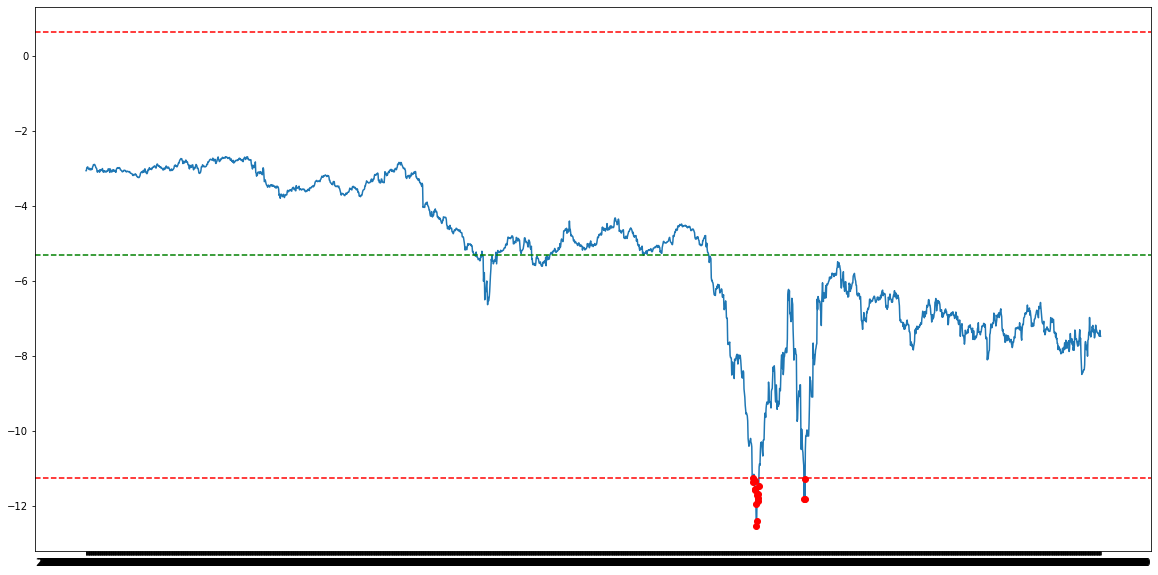

In [54]:
# Plotting the Control Chart

outliers = joined_df[(joined_df['residuals'] < lower_control_limit) | (joined_df['residuals']> upper_control_limit)]

x_values = joined_df['timestamp']
y_values = joined_df['residuals'] 

fig, ax = plt.subplots(figsize=(20, 10))

ax.plot(x_values, y_values, label = 'Residuals' )
plt.axhline(y=upper_control_limit, color='r', linestyle='--', label='Subline (y=upper_bound)')
plt.axhline(y=lower_control_limit, color='r', linestyle='--', label='Subline (y=lower_bound)') 
plt.axhline(y=mean_residuals, color='g', linestyle='--', label='Subline (y=mean)') 


highlight_x = outliers['timestamp']
highlight_y = outliers['residuals']

plt.scatter(highlight_x, highlight_y, color='red', label=f'Point ({highlight_x}, {highlight_y})', zorder=5)

Above we have the control chart for the residuals and below we have the trading simulation results for the outliers. We assumed at the beginning, we have enough stocks from each company. When we have an outlier = -1, it means that our prediction for GARAN price is greater than its current price. Since our prediction is greater, we know that AKBNK price will go up. Therefore at these points, we sell 1 stock of GARAN and buy 1 stock of AKBNK.

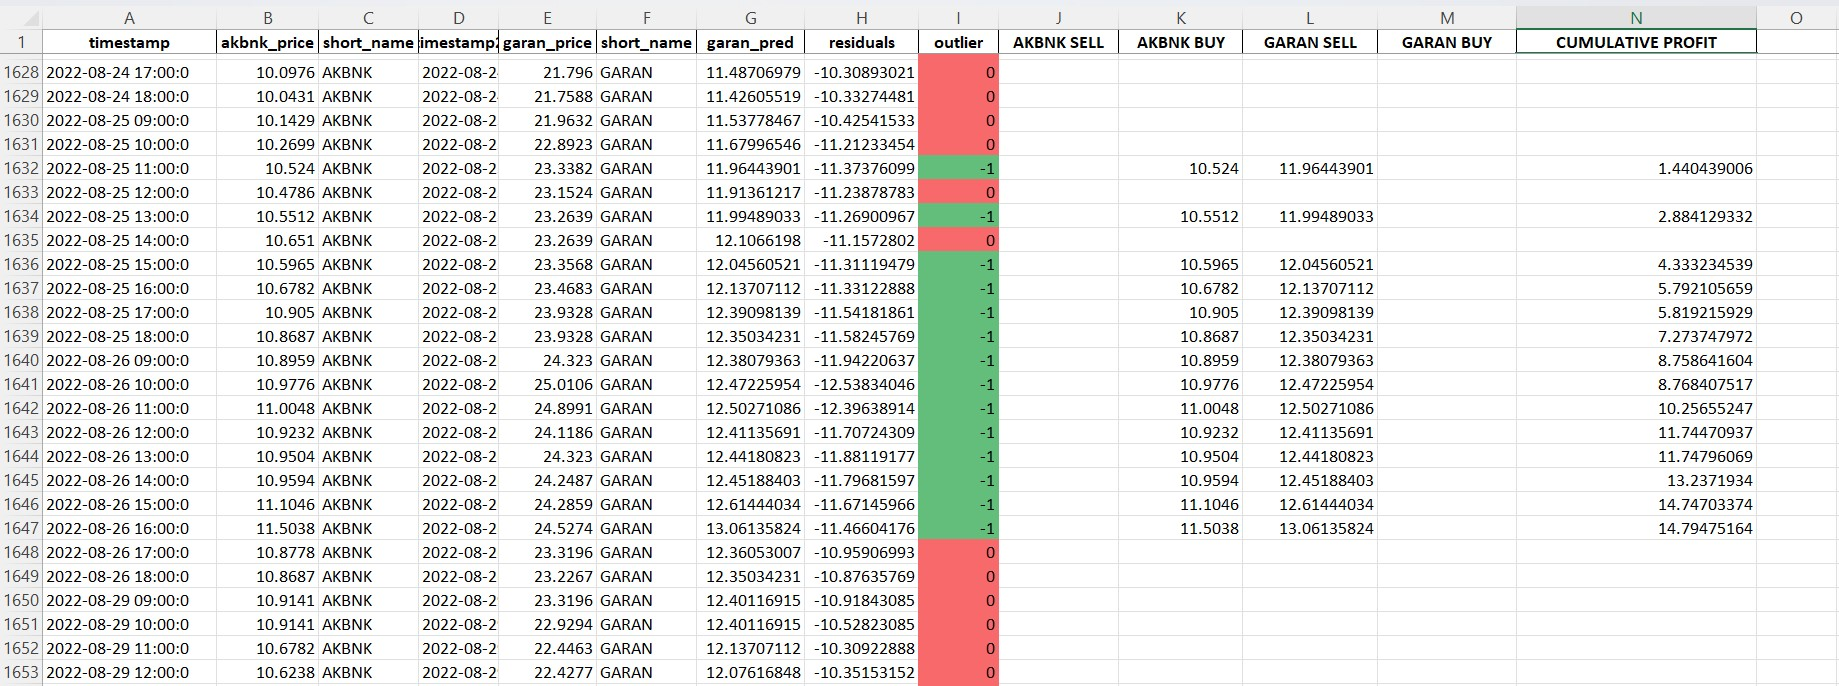

# KCHOL & YKBNK

### For these two stocks, we utilized the same methods as we did for the previous pair.

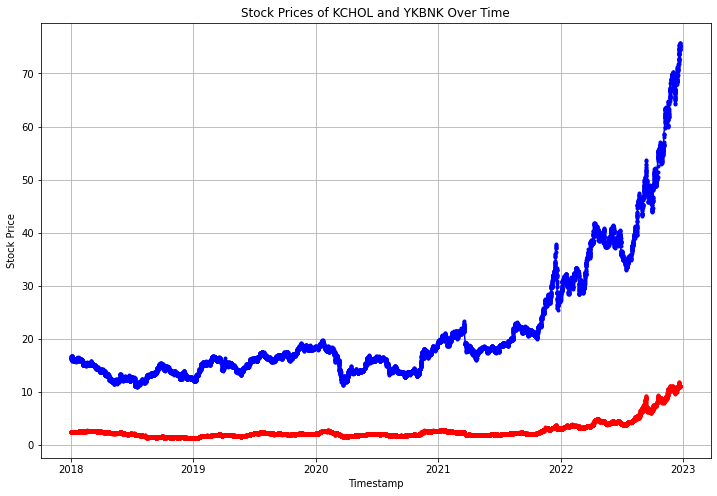

In [55]:
kchol_data = combined_data[combined_data['short_name'] == 'KCHOL']
ykbnk_data = combined_data[combined_data['short_name'] == 'YKBNK']

# Plotting
plt.figure(figsize=(12, 8))
plt.plot(kchol_data['timestamp'], kchol_data['price'], marker='.', linestyle='-', label='KCHOL', color='b')
plt.plot(ykbnk_data['timestamp'], ykbnk_data['price'], marker='.', linestyle='-', label='YKBNK', color='r')

plt.title('Stock Prices of KCHOL and YKBNK Over Time')
plt.xlabel('Timestamp')
plt.ylabel('Stock Price')
plt.grid(True)
plt.show()

Mean Squared Error: 0.02583494272535929
R-squared: 0.8677104901647906
Coefficients: 0.9522286506949408
Intercept: -1.9271308753718364


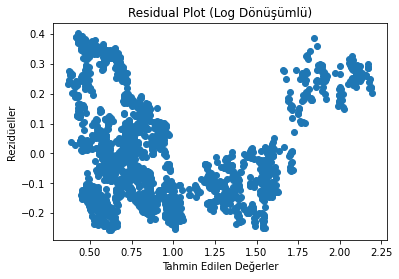

p-value for Breusch-Pagan Test: 0.232107925167207
                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.868
Model:                            OLS   Adj. R-squared:                  0.868
Method:                 Least Squares   F-statistic:                 1.025e+04
Date:                Mon, 11 Dec 2023   Prob (F-statistic):               0.00
Time:                        20:33:15   Log-Likelihood:                 1015.3
No. Observations:                2482   AIC:                            -2027.
Df Residuals:                    2480   BIC:                            -2015.
Df Model:                           1                                         
Covariance Type:                  HC3                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
co

In [58]:
kchol_prices = company_dataframes['KCHOL']['price']

ykbnk_prices = company_dataframes['YKBNK']['price']


kchol_prices_log = np.log(kchol_prices)
ykbnk_prices_log = np.log(ykbnk_prices)


kchol_prices_train, kchol_prices_test, ykbnk_prices_train, ykbnk_prices_test = train_test_split(
    kchol_prices_log, ykbnk_prices_log, test_size=0.2, random_state=42
)


model = LinearRegression()


model.fit(kchol_prices_train.values.reshape(-1, 1), ykbnk_prices_train.values)


ykbnk_pred = model.predict(kchol_prices_test.values.reshape(-1, 1))

mse = mean_squared_error(ykbnk_prices_test, ykbnk_pred)
r2 = r2_score(ykbnk_prices_test, ykbnk_pred)

coeff = model.coef_[0]
intercept = model.intercept_

print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')
print(f'Coefficients: {coeff}')
print(f'Intercept: {intercept}')


residuals = ykbnk_prices_test - ykbnk_pred
plt.scatter(ykbnk_pred, residuals)
plt.xlabel('Tahmin Edilen Değerler')
plt.ylabel('Rezidüeller')
plt.title('Residual Plot (Log Dönüşümlü)')
plt.show()

exog = sm.add_constant(kchol_prices_test)


_, p_value, _, _ = het_breuschpagan(residuals, exog)

print(f'p-value for Breusch-Pagan Test: {p_value}')


results = sm.OLS(ykbnk_prices_test, exog).fit()
results_robust = results.get_robustcov_results(cov_type='HC3')

print(results_robust.summary())

In [67]:
kchol_df = company_dataframes['KCHOL']
ykbnk_df = company_dataframes['YKBNK']

# len(kchol_prices_test) is the number of rows we want to select
num_rows_to_select = len(kchol_prices_test)

# Use the tail method to select the last rows
kchol_df_last_rows = kchol_df.tail(num_rows_to_select)

ykbnk_df_last_rows = ykbnk_df.tail(num_rows_to_select)


# Test verileri üzerinde tahmin yap
ykbnk_pred_simulation = model.predict(np.array(kchol_df_last_rows['price']).reshape(-1, 1))


residuals_simulation = ykbnk_pred_simulation - np.array(ykbnk_df_last_rows['price'])
print(residuals_simulation)

[21.38685688 21.4326148  21.66034362 ... 57.99176374 58.57889072
 58.58799072]


In [68]:
# Change column names
kchol_df_last_rows = kchol_df_last_rows.rename(columns={'price': 'kchol_price'})
ykbnk_df_last_rows = ykbnk_df_last_rows.rename(columns={'price': 'ykbnk_price'})
ykbnk_df_last_rows = ykbnk_df_last_rows.rename(columns={'timestamp': 'timestamp2'})

# Join DataFrames
joined_df = pd.concat([kchol_df_last_rows, ykbnk_df_last_rows], axis=1)

# Add 'ykbnk_pred' column
joined_df['ykbnk_pred'] = ykbnk_pred_simulation

# Add 'residuals' column
joined_df['residuals'] = residuals_simulation

joined_df

,timestamp,kchol_price,short_name,timestamp2,ykbnk_price,short_name,ykbnk_pred,residuals
9927,2021-12-29 13:00:00+03:00,27.7198,KCHOL,2021-12-29 13:00:00+03:00,3.0816,YKBNK,24.468457,21.386857
9928,2021-12-29 14:00:00+03:00,27.7772,KCHOL,2021-12-29 14:00:00+03:00,3.0905,YKBNK,24.523115,21.432615
9929,2021-12-29 15:00:00+03:00,28.0257,KCHOL,2021-12-29 15:00:00+03:00,3.0994,YKBNK,24.759744,21.660344
9930,2021-12-29 16:00:00+03:00,28.2550,KCHOL,2021-12-29 16:00:00+03:00,3.0994,YKBNK,24.978090,21.878690
9931,2021-12-29 17:00:00+03:00,28.1595,KCHOL,2021-12-29 17:00:00+03:00,3.0994,YKBNK,24.887152,21.787752
...,...,...,...,...,...,...,...,...
12404,2022-12-23 14:00:00+03:00,74.6230,KCHOL,2022-12-23 14:00:00+03:00,11.1752,YKBNK,69.131028,57.955828
12405,2022-12-23 15:00:00+03:00,74.9165,KCHOL,2022-12-23 15:00:00+03:00,11.1019,YKBNK,69.410507,58.308607
12406,2022-12-23 16:00:00+03:00,74.5741,KCHOL,2022-12-23 16:00:00+03:00,11.0927,YKBNK,69.084464,57.991764
12407,2022-12-23 17:00:00+03:00,75.2099,KCHOL,2022-12-23 17:00:00+03:00,11.1110,YKBNK,69.689891,58.578891


In [80]:
# Calculate mean and standard deviation
mean_residuals = np.mean(residuals_simulation)
std_residuals = np.std(residuals_simulation)

# Calculate upper and lower control limits
upper_control_limit = mean_residuals + 2.5 * std_residuals        # When we tried 3-sigma limits, we did not see any outliers. Hence we changed the limits to 2.5-sigma.
lower_control_limit = mean_residuals - 2.5 * std_residuals


# Display the results
print(f"Mean of residuals: {mean_residuals}")
print(f"Standard Deviation of residuals: {std_residuals}")
print(f"Upper Control Limit: {upper_control_limit}")
print(f"Lower Control Limit: {lower_control_limit}")

joined_df['outlier'] = 0  # Initialize all values to 0

# Set values based on conditions
joined_df.loc[joined_df['residuals'] < lower_control_limit, 'outlier'] = -1
joined_df.loc[joined_df['residuals'] > upper_control_limit, 'outlier'] = 1

Mean of residuals: 33.52590045959989
Standard Deviation of residuals: 9.026298398919202
Upper Control Limit: 56.09164645689789
Lower Control Limit: 10.960154462301883


In [83]:

joined_df['timestamp'] = pd.to_datetime(joined_df['timestamp'], utc=True)
joined_df['timestamp'] = joined_df['timestamp'].dt.strftime('%Y-%m-%d %H:%M:%S%z')

# Remove timezone information
joined_df['timestamp'] = joined_df['timestamp'].apply(lambda x: x[:-6])

joined_df['timestamp2'] = pd.to_datetime(joined_df['timestamp2'], utc=True)
joined_df['timestamp2'] = joined_df['timestamp2'].dt.strftime('%Y-%m-%d %H:%M:%S%z')

# Remove timezone information
joined_df['timestamp2'] = joined_df['timestamp2'].apply(lambda x: x[:-6])

joined_df.to_excel('output_file_kchol_ykbnk.xlsx', index=False)

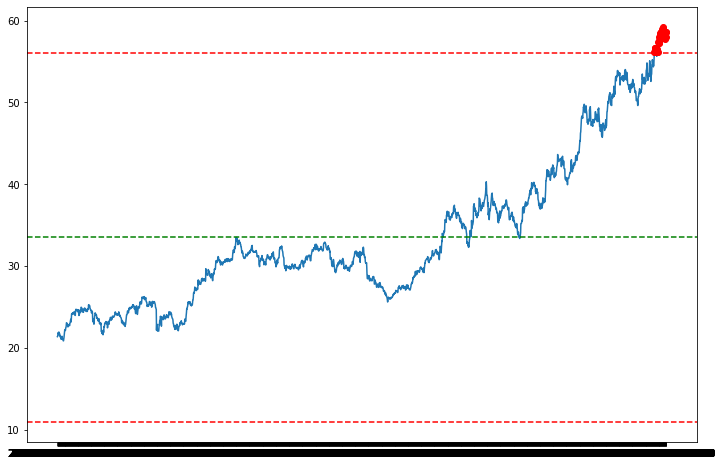

In [82]:
# Plotting the Control Chart

outliers = joined_df[(joined_df['residuals'] < lower_control_limit) | (joined_df['residuals']> upper_control_limit)]

x_values = joined_df['timestamp']
y_values = joined_df['residuals'] 

fig, ax = plt.subplots(figsize=(12, 8))

ax.plot(x_values, y_values, label = 'Residuals' )
plt.axhline(y=upper_control_limit, color='r', linestyle='--', label='Subline (y=upper_bound)')
plt.axhline(y=lower_control_limit, color='r', linestyle='--', label='Subline (y=lower_bound)') 
plt.axhline(y=mean_residuals, color='g', linestyle='--', label='Subline (y=mean)') 


highlight_x = outliers['timestamp']
highlight_y = outliers['residuals']

plt.scatter(highlight_x, highlight_y, color='red', label=f'Point ({highlight_x}, {highlight_y})', zorder=5)

Above we have the control chart for the residuals and below we have the trading simulation results for the outliers. We assumed at the beginning, we have enough stocks from each company. When we have an outlier = -1, it means that our prediction for YKBNK price is greater than its current price. Since our prediction is greater, we know that KCHOL price will go up. Therefore at these points, we sell 1 stock of YKBNK and buy 1 stock of KCHOL.

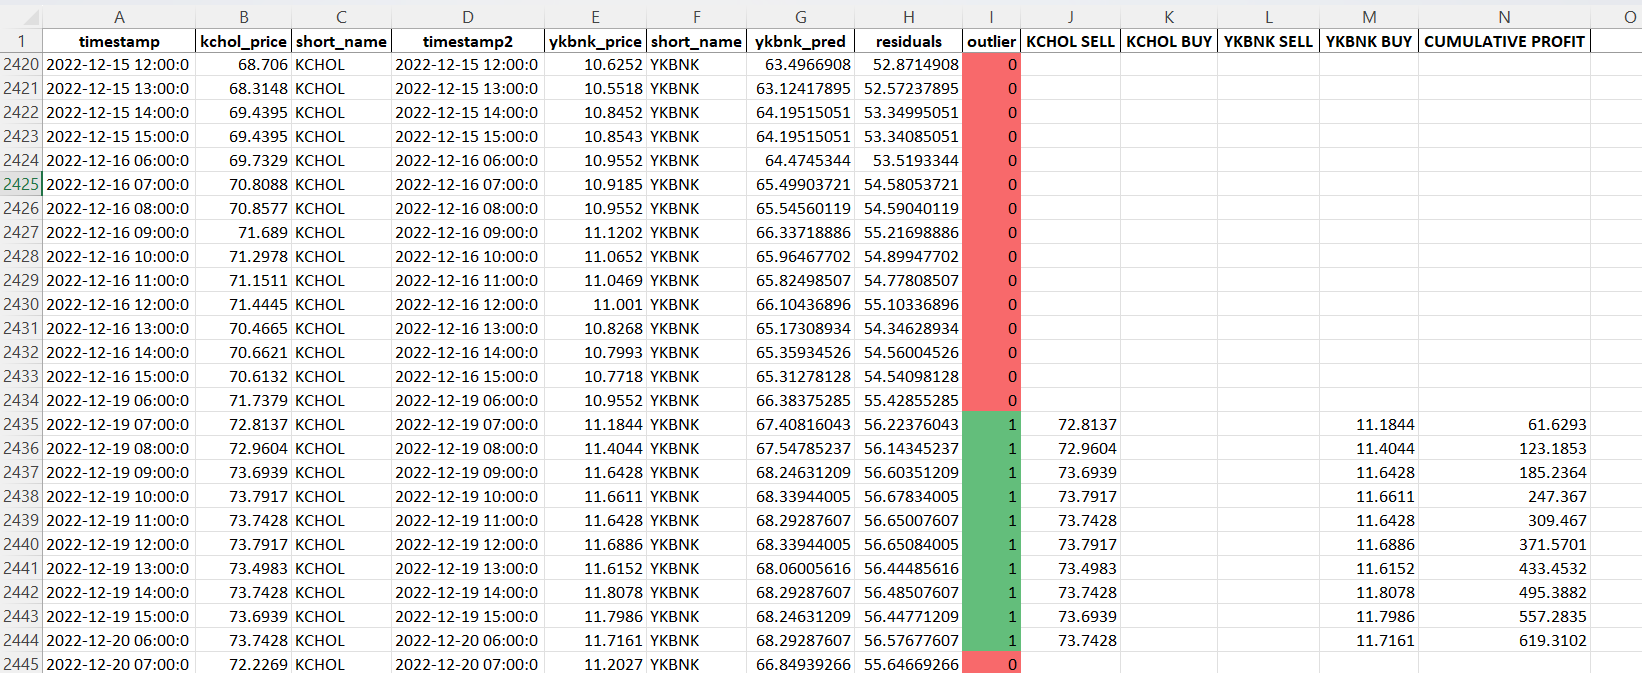

## Summary and Conclusions:

### Part-1:

We first iterated through our data to find the best company combinations in terms of correlation, by examining each company pair's Pearson correlation value. We chose the GARAN and AKBNK companies as pairs since they had a Pearson correlation of 0.9926. We created and trained a linear regression model between the two stocks, and tested it with test data. We then applied the Breusch-Pagan test to check if the residuals hold constant variance assumption. Since the test result was too small, we couldn't conclude at that point that the residuals showed constant variance and moved on with a log transformation. This improved the test result, but not sufficient enough to prove a constant variance assumption. Finally, to address this issue, we excluded the last year from the data, which ultimately yielded a satisfactory constant variance result. We continued with predicting the last year's prices and calculating the residuals, and then producing an excel for the trading simulation. Afterwards, we constructed a control chart for the residuals along with the trading simulation results for the outliers. It's important to note that at the beginning we assumed to have enough stocks from each company. With this methodology, we finalized our trading simulation succesfully. After the first pair of companies were successfully completed, we moved on with another pair: KCHOL and YKBNK. We utilized the same framework for yet another simulation of the stocks of these companies.

### Part-2:




### Overall Summary:

With this project, we experienced a more solid approach to stock markets, while also utilizing our knowledge of control charts and time series. We understood that pairs trading strategy works best between companies of similar nature from similar (if not the exact same) sector. We also saw that sometimes focusing on short-run swift stock trading (like this pair trading example) may yield quite reliable and fast results; and that it can yield smaller risks than it is usually perceived when done correctly just like how we experienced in this project.


### Effectiveness and Limitations of Each Approach:

Task 1 - Basic Pairs Trading Strategy Using Constant Variance Assumption:
This approach offers a more straightforward and easy to implement method for identifying the trading opportunities. However, the constant variance assumption may easily lead to inaccuracies in dynamic real world market conditions. It may overlook underlying trends, and will be unable to foresee unexpected occurences.

Task 2 - Advanced Pairs Trading Strategy Using Time Series Analysis:
This approach is more advanced, since it also utilizes time series analysis to address the limitations of the previous strategy by adapting to changing market conditions. This method yields better model residuals and more accurate control limits, leading to a more responsive trading model. However, this strategy is obviously more complex to implement.
